In [5]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
# Read the data using pandas
mydata = pd.read_csv(r"C:\Users\PMLS\Desktop\U19953_Assignment_1_testdata.csv")



In [8]:
# Task 1: Calculate means and standard deviations
means_sd = mydata.iloc[:, 1:].agg(['mean', 'std']).T
means_sd['Variable'] = means_sd.index
means_sd = means_sd[['Variable', 'mean', 'std']]
print("Task 1: Means and Standard Deviations")
print(means_sd)

Task 1: Means and Standard Deviations
                                                        Variable  \
Type 1 \n(Less than 4 hours)        Type 1 \n(Less than 4 hours)   
Type 2 \n(Less than 4 hours)        Type 2 \n(Less than 4 hours)   
Type 3 \n(Less than 4 hours)        Type 3 \n(Less than 4 hours)   
Type 1 \n(Greater than 4 hours)  Type 1 \n(Greater than 4 hours)   
Type 2 \n(Greater than 4 hours)  Type 2 \n(Greater than 4 hours)   
Type 3 \n(Greater than 4 hours)  Type 3 \n(Greater than 4 hours)   

                                          mean           std  
Type 1 \n(Less than 4 hours)     942290.756303  80554.995606  
Type 2 \n(Less than 4 hours)      43092.806723   5615.125548  
Type 3 \n(Less than 4 hours)     577072.697479  77324.470878  
Type 1 \n(Greater than 4 hours)  140777.806723  81855.046338  
Type 2 \n(Greater than 4 hours)     349.663866    221.220738  
Type 3 \n(Greater than 4 hours)    3087.605042   2726.269324  


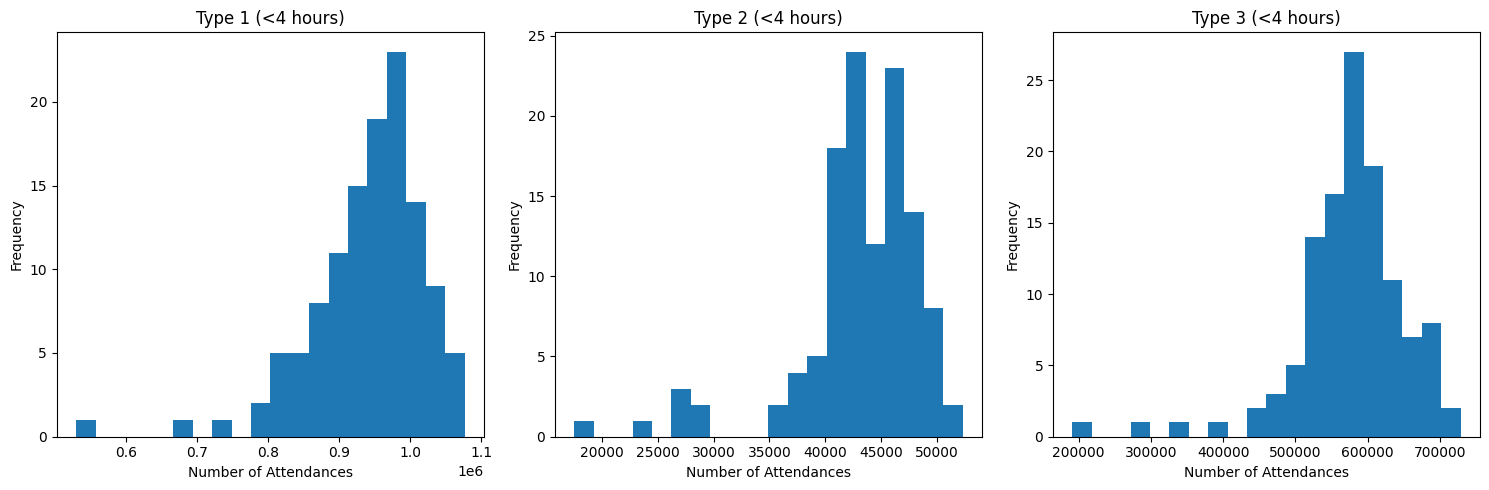

In [10]:
# Histograms
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot histograms for Type 1, Type 2, and Type 3 (<4 hours)
mydata.iloc[:, 1].plot(kind='hist', ax=axes[0], bins=20, title="Type 1 (<4 hours)")
axes[0].set_xlabel("Number of Attendances")

mydata.iloc[:, 2].plot(kind='hist', ax=axes[1], bins=20, title="Type 2 (<4 hours)")
axes[1].set_xlabel("Number of Attendances")

mydata.iloc[:, 3].plot(kind='hist', ax=axes[2], bins=20, title="Type 3 (<4 hours)")
axes[2].set_xlabel("Number of Attendances")

plt.tight_layout()
plt.show()

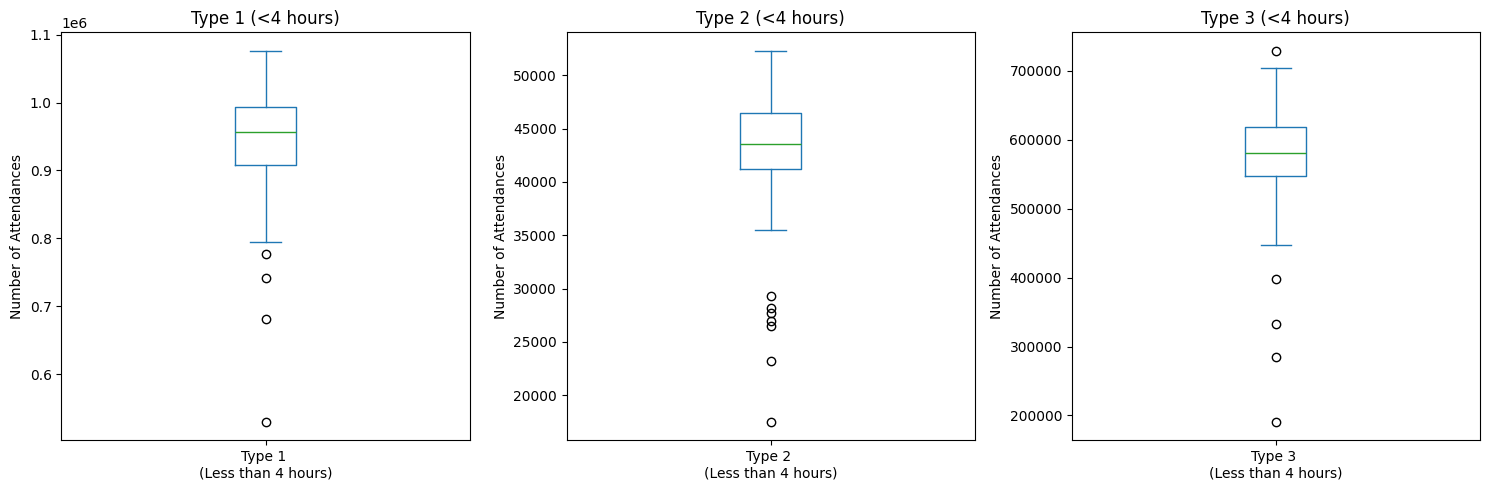

In [11]:
# Box Plots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot box plots for Type 1, Type 2, and Type 3 (<4 hours)
mydata.iloc[:, 1].plot(kind='box', ax=axes[0], title="Type 1 (<4 hours)")
axes[0].set_ylabel("Number of Attendances")

mydata.iloc[:, 2].plot(kind='box', ax=axes[1], title="Type 2 (<4 hours)")
axes[1].set_ylabel("Number of Attendances")

mydata.iloc[:, 3].plot(kind='box', ax=axes[2], title="Type 3 (<4 hours)")
axes[2].set_ylabel("Number of Attendances")

plt.tight_layout()
plt.show()

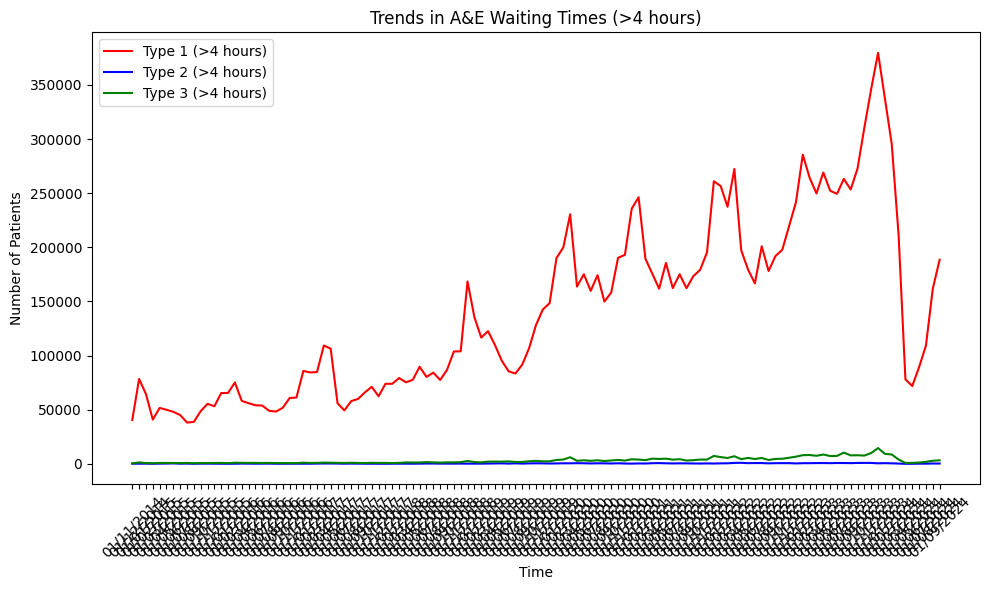

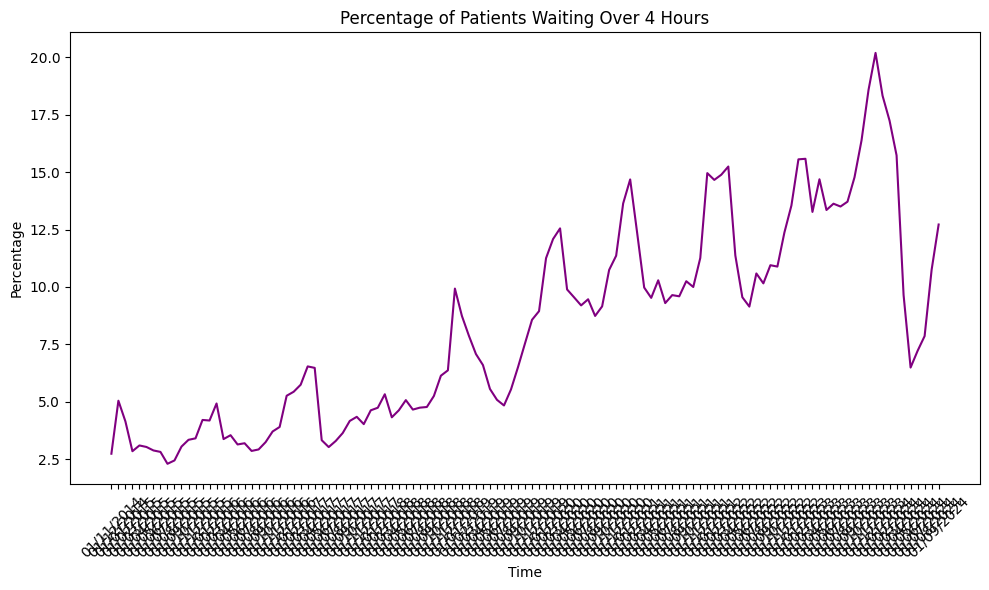


Percentage change in waiting times (last 12 months vs previous 12 months):
Type 1 \n(Greater than 4 hours)   -14.533330
Type 2 \n(Greater than 4 hours)   -42.372881
Type 3 \n(Greater than 4 hours)   -27.697958
dtype: float64


In [12]:
# Task 3: Trends Analysis for greater than 4 hours waiting time
# Create time series plot
plt.figure(figsize=(10, 6))
plt.plot(mydata['Months'], mydata.iloc[:, 4], color='red', label="Type 1 (>4 hours)")
plt.plot(mydata['Months'], mydata.iloc[:, 5], color='blue', label="Type 2 (>4 hours)")
plt.plot(mydata['Months'], mydata.iloc[:, 6], color='green', label="Type 3 (>4 hours)")

plt.title("Trends in A&E Waiting Times (>4 hours)")
plt.xlabel("Time")
plt.ylabel("Number of Patients")
plt.legend(loc="upper left")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Calculate percentage of patients waiting over 4 hours
total_under4 = mydata.iloc[:, 1:4].sum(axis=1)
total_over4 = mydata.iloc[:, 4:7].sum(axis=1)
percentage_over4 = (total_over4 / (total_under4 + total_over4)) * 100

# Plot percentage trend
plt.figure(figsize=(10, 6))
plt.plot(mydata['Months'], percentage_over4, color='purple')
plt.title("Percentage of Patients Waiting Over 4 Hours")
plt.xlabel("Time")
plt.ylabel("Percentage")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Recent trends analysis (last 12 months vs previous 12 months)
recent_12 = mydata.iloc[-12:, 4:7]
previous_12 = mydata.iloc[-24:-12, 4:7]

recent_means = recent_12.mean()
previous_means = previous_12.mean()
percent_change = ((recent_means - previous_means) / previous_means) * 100

print("\nPercentage change in waiting times (last 12 months vs previous 12 months):")
print(percent_change)